HPLC ANALSIS OF COMPOUNDS

Set:
    filename to .csv with data structure:
            'mouse_no' 'group_no' 'compound_region'
                1           2           ng_mg
    treatment_mapping: 
    compound_ratio_mapping: dictionary of the ratios of interest 
    experimental_info: 
    

QUANTITATIVE ANALYSIS
    aggrogate stats
    histograms comparing mean +/- SEM

QUALITATIVE ANALYSIS
    correlograms
    PCA


for brain atlas mapping and displaying data: https://github.com/Whitlock-Group/HERBS

Imports and Constants:

In [2]:
%load_ext autoreload
%autoreload 2

from HPLC_MODULE_NOTEBOOK import * #Must be reimported when changes made to module file

treatment_mapping = { 
    1: {'treatment': 'vehicles', 'color': "white", 'experiments': ['dose_response','agonist_antagonist'], 'markers': 'o'},
    2: {'treatment': '10mg/kgTCB', 'color': "firebrick", 'experiments': ['dose_response'], 'markers': '^'},
    3: {'treatment': '3mg/kgTCB', 'color': "red", 'experiments': ['dose_response','agonist_antagonist'], 'markers': 's'},
    4: {'treatment': '0.3mg/kgTCB', 'color': "salmon", 'experiments': ['dose_response'], 'markers': 'v'},
    5: {'treatment': 'TCB+MDL', 'color': "grey", 'experiments': ['agonist_antagonist'], 'markers': 'd'},
    6: {'treatment': '0.2mg/kgMDL', 'color': "black", 'experiments': ['agonist_antagonist'], 'markers': 'p'}
    } 
compound_ratio_mapping = {'DOPAC': ['DA'],     
                       '5HIAA': ['5HT'],
                       '3MT': ['DA'],
                       'HVA': ['DA', '3MT', 'DOPAC'],
                       'GLN': ['GLU']}

experimental_info = {'dose_response': {'groups':[1,2,3,4], 'independant_vars': ['TCB2']}, 
                     'agonist_antagonist':{
                         'groups':[1,3,5,6], 
                         'independant_vars': ['TCB2', 'MDL', ], 
                         'outliers': 'grubbs', 
                         'correlation_statistics': 'pearson', 
                         'quantitative_statistics': {'twoway_anova':True, 'oneoway_tukey':True, 'tukey':True}}}



region_subclassification = {
    'cortex': {'regions': ['OF', 'PL', 'CC', 'IC', 'M', 'SL1', 'SR1', 'AC', 'V'], 'color': 'mediumblue'},
    'subcortical_telencephalon': {'regions': ['Am', 'dH', 'vH', 'NAc', 'VM', 'DM', 'VL', 'DL'], 'color': 'orange'},
    'diencephalon': {'regions': ['MD', 'VPL', 'VPR', 'DG', 'Y'], 'color': 'darkorchid'},
    'mesencephalon': {'regions': ['SC', 'SN', 'VTA', 'DR', 'MR'], 'color': 'forestgreen'},
    'cerebellum': {'regions': ['CE'], 'color': 'peru'}}

filename = 'TCB2_data_HPLC.csv'  # TCB2 #using current working directory plus file name 
HT_filename = 'TCB2_data_HT.csv'


saveMetadata(filename, treatment_mapping, experimental_info, region_subclassification)
# getSingleHistogram(filename, 'agonist_antagonist', '5HT', 'CC', 0.05, from_scratch = True)
# getQuantitativeStats(filename, region, compound, experiment, ['twoway_anova', 'oneway_anova', 'tukey'])



TREATMENT MAPPING {1: {'treatment': 'vehicles', 'color': 'white', 'experiments': ['dose_response', 'agonist_antagonist'], 'markers': 'o'}, 2: {'treatment': '10mg/kgTCB', 'color': 'firebrick', 'experiments': ['dose_response'], 'markers': '^'}, 3: {'treatment': '3mg/kgTCB', 'color': 'red', 'experiments': ['dose_response', 'agonist_antagonist'], 'markers': 's'}, 4: {'treatment': '0.3mg/kgTCB', 'color': 'salmon', 'experiments': ['dose_response'], 'markers': 'v'}, 5: {'treatment': 'TCB+MDL', 'color': 'grey', 'experiments': ['agonist_antagonist'], 'markers': 'd'}, 6: {'treatment': '0.2mg/kgMDL', 'color': 'black', 'experiments': ['agonist_antagonist'], 'markers': 'p'}} SAVED TO /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC SUBCACHE
EXPERIMENTAL INFO {'dose_response': {'groups': [1, 2, 3, 4], 'independant_vars': ['TCB2']}, 'agonist_antagonist': {'groups': [1, 3, 5, 6], 'independant_vars': ['TCB2', 'MDL'], 'outliers': 'grubbs', 'correlation_statistics': 'pearson', 'quantitative_st

In [ ]:
#HEAD TWITCH BEHAVIORAL ANALYSIS
HT_df = getRawHTDf(HT_filename)
getHTHistogram(filename, HT_filename, experiment='agonist_antagonist', p_value_threshold=0.05, to_plot=['HT_20'], from_scratch=True)


OUTLIER DETECTION 

In [16]:

    #propose outliers and show on plot with group: 
    #accept or reject 
    #modity df and save something indicating removed data 


AGGREGATE STATS
    df with:  shapiro_F, shapiro_p, is_valid, mean, SD, SEM, list of values
    for each treatment/region/compound or treatment/region/ratio

GETTING "ratio_aggregate_stats" FROM "TCB2_data_HPLC" CACHE


/Users/jasminebutler/Desktop/phd/HPLC_MODULE_NOTEBOOK.py:500: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experimental_df.loc[:, 'percentage_of_vehicles'] = experimental_df.groupby('region')['mean'].transform(lambda x: (x / x.loc[experimental_df['treatment'] == 'vehicles'].values[0]) * 100)


CREATED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/dose_response_for_GLU_OF,PL,CC,IC,M,SJ,SL1,SR1,AC,V,Am,dH,vH,NAc,VM,DM,VL,DL,MD,VPL,VPR,DG,Y,SC,SN,VTA,DR,MR,CE.pkl CACHE
SAVED /Users/jasminebutler/Desktop/phd/output/QuantitativeSummaryFigs/dose_response_for_GLU_OF,PL,CC,IC,M,SJ,SL1,SR1,AC,V,Am,dH,vH,NAc,VM,DM,VL,DL,MD,VPL,VPR,DG,Y,SC,SN,VTA,DR,MR,CE.svg
SAVED /Users/jasminebutler/Desktop/phd/output/QuantitativeSummaryFigs/dose_response_for_GLU_OF,PL,CC,IC,M,SJ,SL1,SR1,AC,V,Am,dH,vH,NAc,VM,DM,VL,DL,MD,VPL,VPR,DG,Y,SC,SN,VTA,DR,MR,CE.png


/Users/jasminebutler/Desktop/phd/HPLC_MODULE_NOTEBOOK.py:487: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


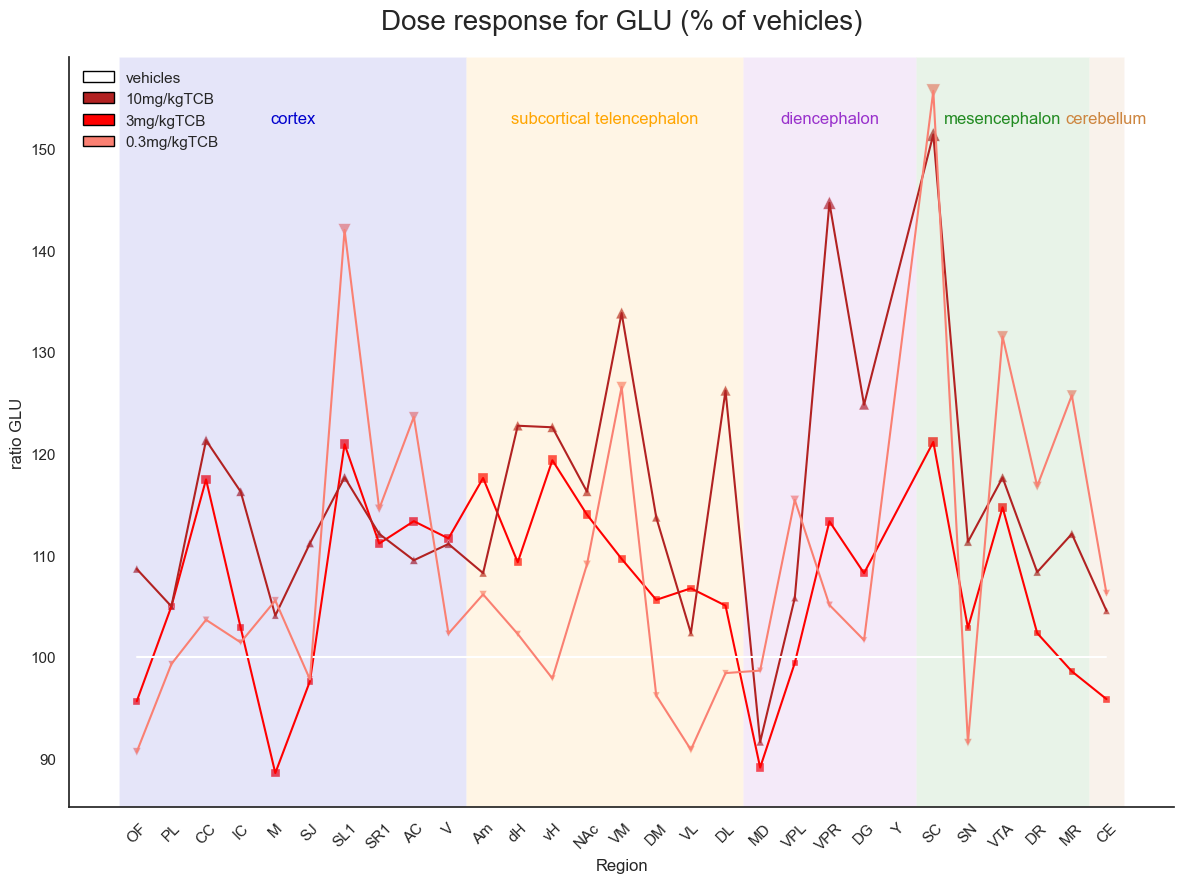

In [8]:
# stats = getAggregateStatsDf(filename, df_type='ratio') #FIX ME: df_type is not meaningless as i am using  getCompoundAndRatiosDf(filename) 

# print(stats['compound'].unique())

columns = ['OF', 'PL', 'CC', 'IC', 'M', 'SJ', 'SL1', 'SR1',  'AC', 'V' , 'Am', 'dH', 'vH', 
                                       'NAc', 'VM', 'DM', 'VL', 'DL', 'MD', 'VPL', 'VPR', 'DG', 'Y', 'SC', 'SN', 'VTA', 
                                       'DR', 'MR', 'CE' ]

getQuantitativeSummaryFig(filename, experiment='dose_response', value_type = 'ratio', value = 'GLU', regions_to_plot=columns, from_scratch=True)

COMPARATIVE STATS 
    df with: compound, region, experiment, single_factor_test, single_factor_p, multiple_factor_test, multiple_factor_p, treatment_1, treatment_2, post_hoc_test, post_hoc_p

GETTING "compound_aggregate_stats" FROM "TCB2_data_APRIL23" CACHE


,treatment,region,compound,shapiro_F,shapiro_p,is_valid,mean,std,sem,values
0,0.2mg/kgMDL,AC,5HIAA,0.931388,0.461682,True,0.116859,0.036906,0.011671,"[0.129558874, 0.103243639, 0.137603989, 0.0736..."
1,0.2mg/kgMDL,AC,5HT,0.980960,0.970100,True,0.099423,0.025240,0.007981,"[0.121272649, 0.092282145, 0.083923844, 0.0579..."
2,0.2mg/kgMDL,AC,5HTP,0.592687,0.000045,True,0.039143,0.062978,0.019915,"[0.017717292, 0.003593031, 0.013304998, 0.0129..."
3,0.2mg/kgMDL,AC,A,0.864360,0.085876,True,0.002212,0.002081,0.000658,"[0.003197882, 0.000260697, 0.003253498, 0.0012..."
4,0.2mg/kgMDL,AC,ALA,0.941838,0.573636,True,39.520359,10.047596,3.177329,"[34.43540514, 51.0982753, 53.46436707, 37.4013..."
...,...,...,...,...,...,...,...,...,...,...
3907,vehicles,vH,LSER,0.820411,0.001063,True,47.996985,19.768975,4.214760,"[72.36113476, 72.36113476, 46.51357707, 46.513..."
3908,vehicles,vH,NA,0.922750,0.086686,True,0.232054,0.041252,0.008795,"[0.218822744, 0.218822744, 0.221792856, 0.2217..."
3909,vehicles,vH,TAU,0.882603,0.013550,True,475.116293,177.306597,37.801893,"[720.2194902, 720.2194902, 486.7247508, 486.72..."
3910,vehicles,vH,THR,0.821384,0.001103,True,17.937869,7.155966,1.525657,"[28.51172535, 28.51172535, 16.52169516, 16.521..."


QUANTITAIVE ANALYSIS 
    stats: perfrom stats in line with experimental_info
    plot histogram of mean +/- SEM with significance show as indicated by experimental_info

In [ ]:
# woudl be ideal here too for new data to have a methid to loop all stats and indicate which are significant and only display those

#reference for stats: https://www.statology.org/tukey-test-python/
# #oneway (df, group_to_compare):
# #inputs: array like groups e.g. group1,group2,group3,group4
# #outputs two floats : F_value, p_value 
# #if p<0.05 the two groups do not have the same population mean 
# F_value, p_value = scipy.stats.f_oneway(group1,group2,group3,group4)

# #two way anova (df, group_to_compare):
# #inputs: df, dv='ng_mg', between= [factor_1, factor_2] #the factors should be boolian columns i.e. TCB2 = T/F and MDL = T/F
# #outputs: df see https://pingouin-stats.org/build/html/generated/pingouin.anova.html
#         # 	Source	SS	DF	MS	F	p-unc	np2
#         # 0	ANT_MDL	0.001	1	0.001	0.053	0.819	0.001
#         # 1	AG_TCB2	0.007	1	0.007	0.671	0.418	0.017
#         # 2	ANT_MDL * AG_TCB2	0.012	1	0.012	1.123	0.296	0.028
#         # 3	Residual	0.415	39	0.011			

# two_way_anova = pg.anova(data=df_anova_working, dv='dv', between=[
#                                       ('ANT_MDL'), ('AG_TCB2')], detailed=True).round(3)



# #tukey  --- post hoc DONE ON SITE AFTER ONE AND TWO WAY ARE IN DF to plot
# #input df'ng_mg', df'grouping'
# mc = MultiComparison(
#     df_dose_responce[comp, BR], df_dose_responce['group', 'no'])
# mc_results = mc.tukeyhsd()

# #old df structure for input to two way ANOVA
# d = {'dv': df_factors[comp, BR][indexes_to_keep], 'ANT_MDL': df_factors['ANT', 'MDL'][indexes_to_keep],
#                   'AG_TCB2': df_factors['AG', 'TCB2'][indexes_to_keep], 'group': df_factors['group', 'no'][indexes_to_keep]}
            



getSingleHistogram(filename, 'dose_response', '5HT', 'CC', 0.05, from_scratch = False)

# buildSingleHistogram(filename, 'dose_response', '5HT', 'CC', 0.05)

QUALITATIVE ANALYSIS - CORRELATIONS

    clasical_corellogram     :      getAndPlotSingleCorrelogram(filename, experiment='agonist_antagonist', correlogram_type='compound',                 
                                                                to_correlate='GLU', p_value_threshold=0.05, n_minimum=5, from_scratch= True) 
                       
    
    square_correlogram       :      getAndPlotSingleCorrelogram(filename, experiment='agonist_antagonist', correlogram_type='compound', 
                                                                to_correlate='GLU-GABA', p_value_threshold=0.05, n_minimum=5, from_scratch= True) 


    bar_corellogram
                                                    #see whatsapp image 3/5/23
        within BR       /       within compound



GETTING "compound_and_ratios_df" FROM "TCB2_data_HPLC" CACHE
CREATED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/agonist_antagonist_compound_5HT_OF,PL,CC,IC,M,SJ,SL1,SR1,AC,V,Am,dH,vH,NAc,VM,DM,VL,DL,MD,VPL,VPR,DG,Y,SC,SN,VTA,DR,MR,CE.pkl CACHE
SAVED /Users/jasminebutler/Desktop/phd/output/correlograms/agonist_antagonist_compound_5HT_OF,PL,CC,IC,M,SJ,SL1,SR1,AC,V,Am,dH,vH,NAc,VM,DM,VL,DL,MD,VPL,VPR,DG,Y,SC,SN,VTA,DR,MR,CE.svg
SAVED /Users/jasminebutler/Desktop/phd/output/correlograms/agonist_antagonist_compound_5HT_OF,PL,CC,IC,M,SJ,SL1,SR1,AC,V,Am,dH,vH,NAc,VM,DM,VL,DL,MD,VPL,VPR,DG,Y,SC,SN,VTA,DR,MR,CE.png
GETTING "compound_and_ratios_df" FROM "TCB2_data_HPLC" CACHE


/Users/jasminebutler/Desktop/phd/HPLC_MODULE_NOTEBOOK.py:376: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


CREATED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/agonist_antagonist_compound_NA_OF,PL,CC,IC,M,SJ,SL1,SR1,AC,V,Am,dH,vH,NAc,VM,DM,VL,DL,MD,VPL,VPR,DG,Y,SC,SN,VTA,DR,MR,CE.pkl CACHE
SAVED /Users/jasminebutler/Desktop/phd/output/correlograms/agonist_antagonist_compound_NA_OF,PL,CC,IC,M,SJ,SL1,SR1,AC,V,Am,dH,vH,NAc,VM,DM,VL,DL,MD,VPL,VPR,DG,Y,SC,SN,VTA,DR,MR,CE.svg
SAVED /Users/jasminebutler/Desktop/phd/output/correlograms/agonist_antagonist_compound_NA_OF,PL,CC,IC,M,SJ,SL1,SR1,AC,V,Am,dH,vH,NAc,VM,DM,VL,DL,MD,VPL,VPR,DG,Y,SC,SN,VTA,DR,MR,CE.png
GETTING "compound_and_ratios_df" FROM "TCB2_data_HPLC" CACHE


/Users/jasminebutler/Desktop/phd/HPLC_MODULE_NOTEBOOK.py:376: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


CREATED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HPLC/agonist_antagonist_compound_GLU_OF,PL,CC,IC,M,SJ,SL1,SR1,AC,V,Am,dH,vH,NAc,VM,DM,VL,DL,MD,VPL,VPR,DG,Y,SC,SN,VTA,DR,MR,CE.pkl CACHE
SAVED /Users/jasminebutler/Desktop/phd/output/correlograms/agonist_antagonist_compound_GLU_OF,PL,CC,IC,M,SJ,SL1,SR1,AC,V,Am,dH,vH,NAc,VM,DM,VL,DL,MD,VPL,VPR,DG,Y,SC,SN,VTA,DR,MR,CE.svg
SAVED /Users/jasminebutler/Desktop/phd/output/correlograms/agonist_antagonist_compound_GLU_OF,PL,CC,IC,M,SJ,SL1,SR1,AC,V,Am,dH,vH,NAc,VM,DM,VL,DL,MD,VPL,VPR,DG,Y,SC,SN,VTA,DR,MR,CE.png


/Users/jasminebutler/Desktop/phd/HPLC_MODULE_NOTEBOOK.py:376: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


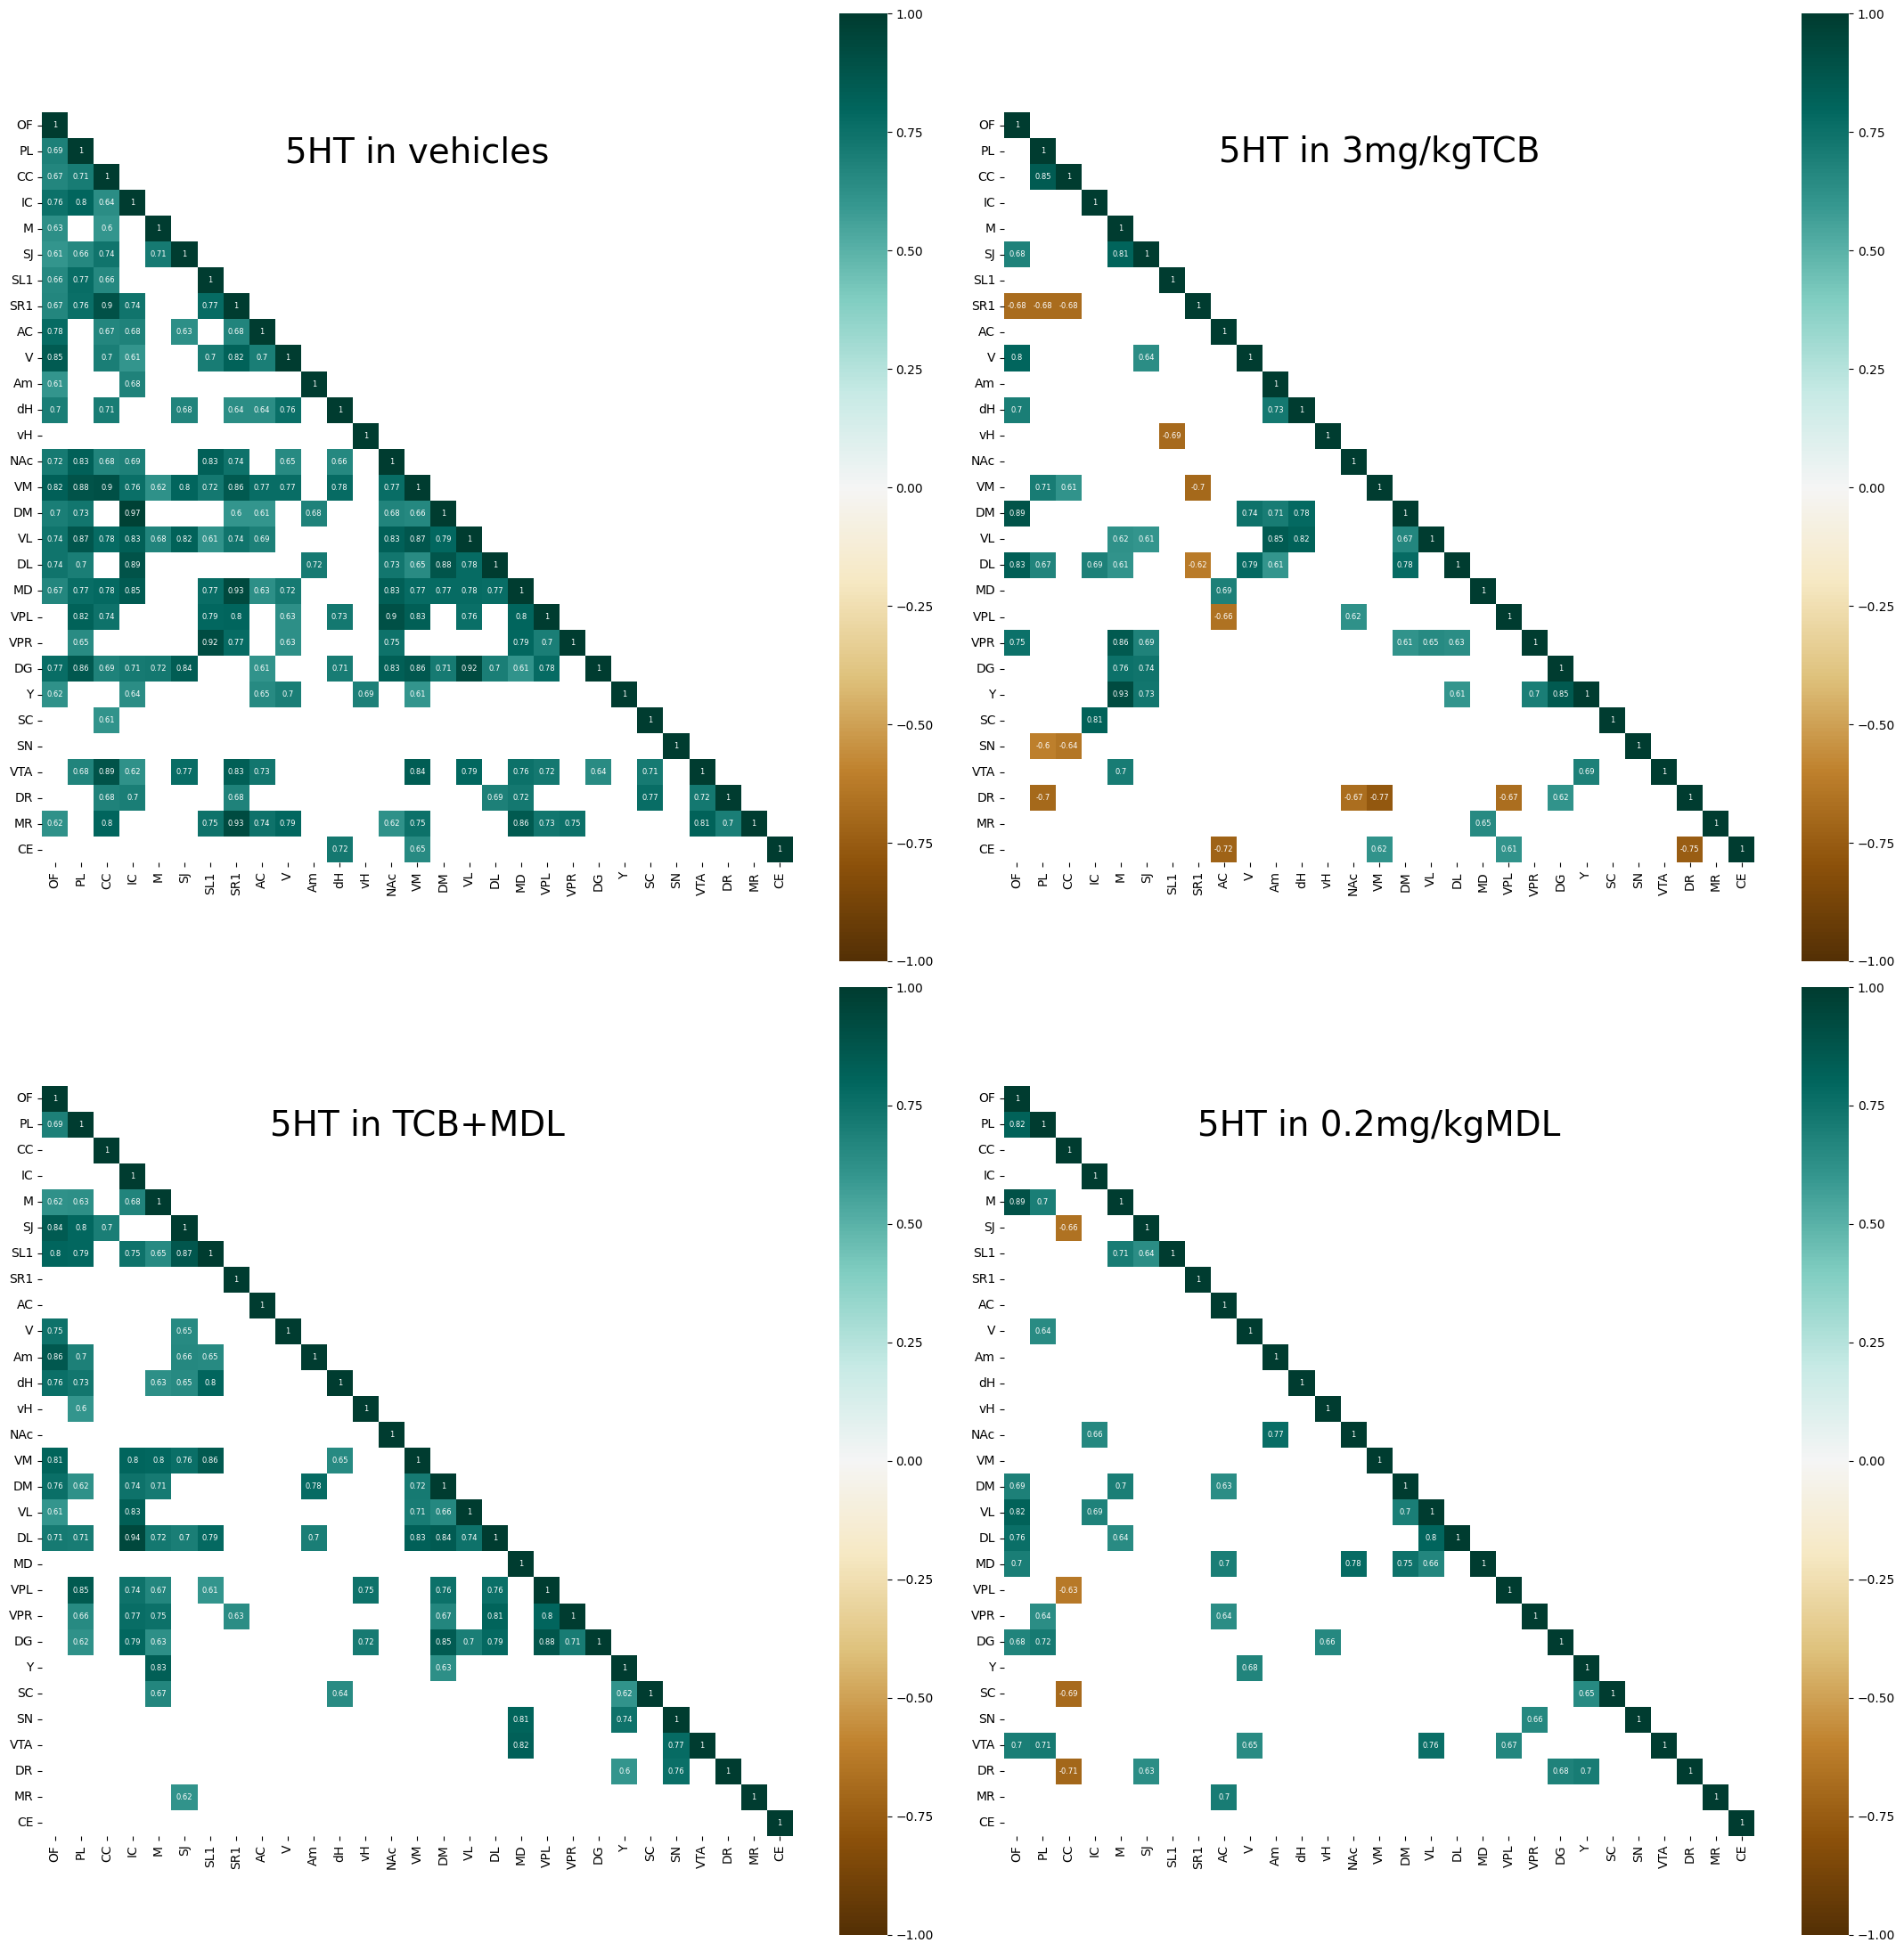

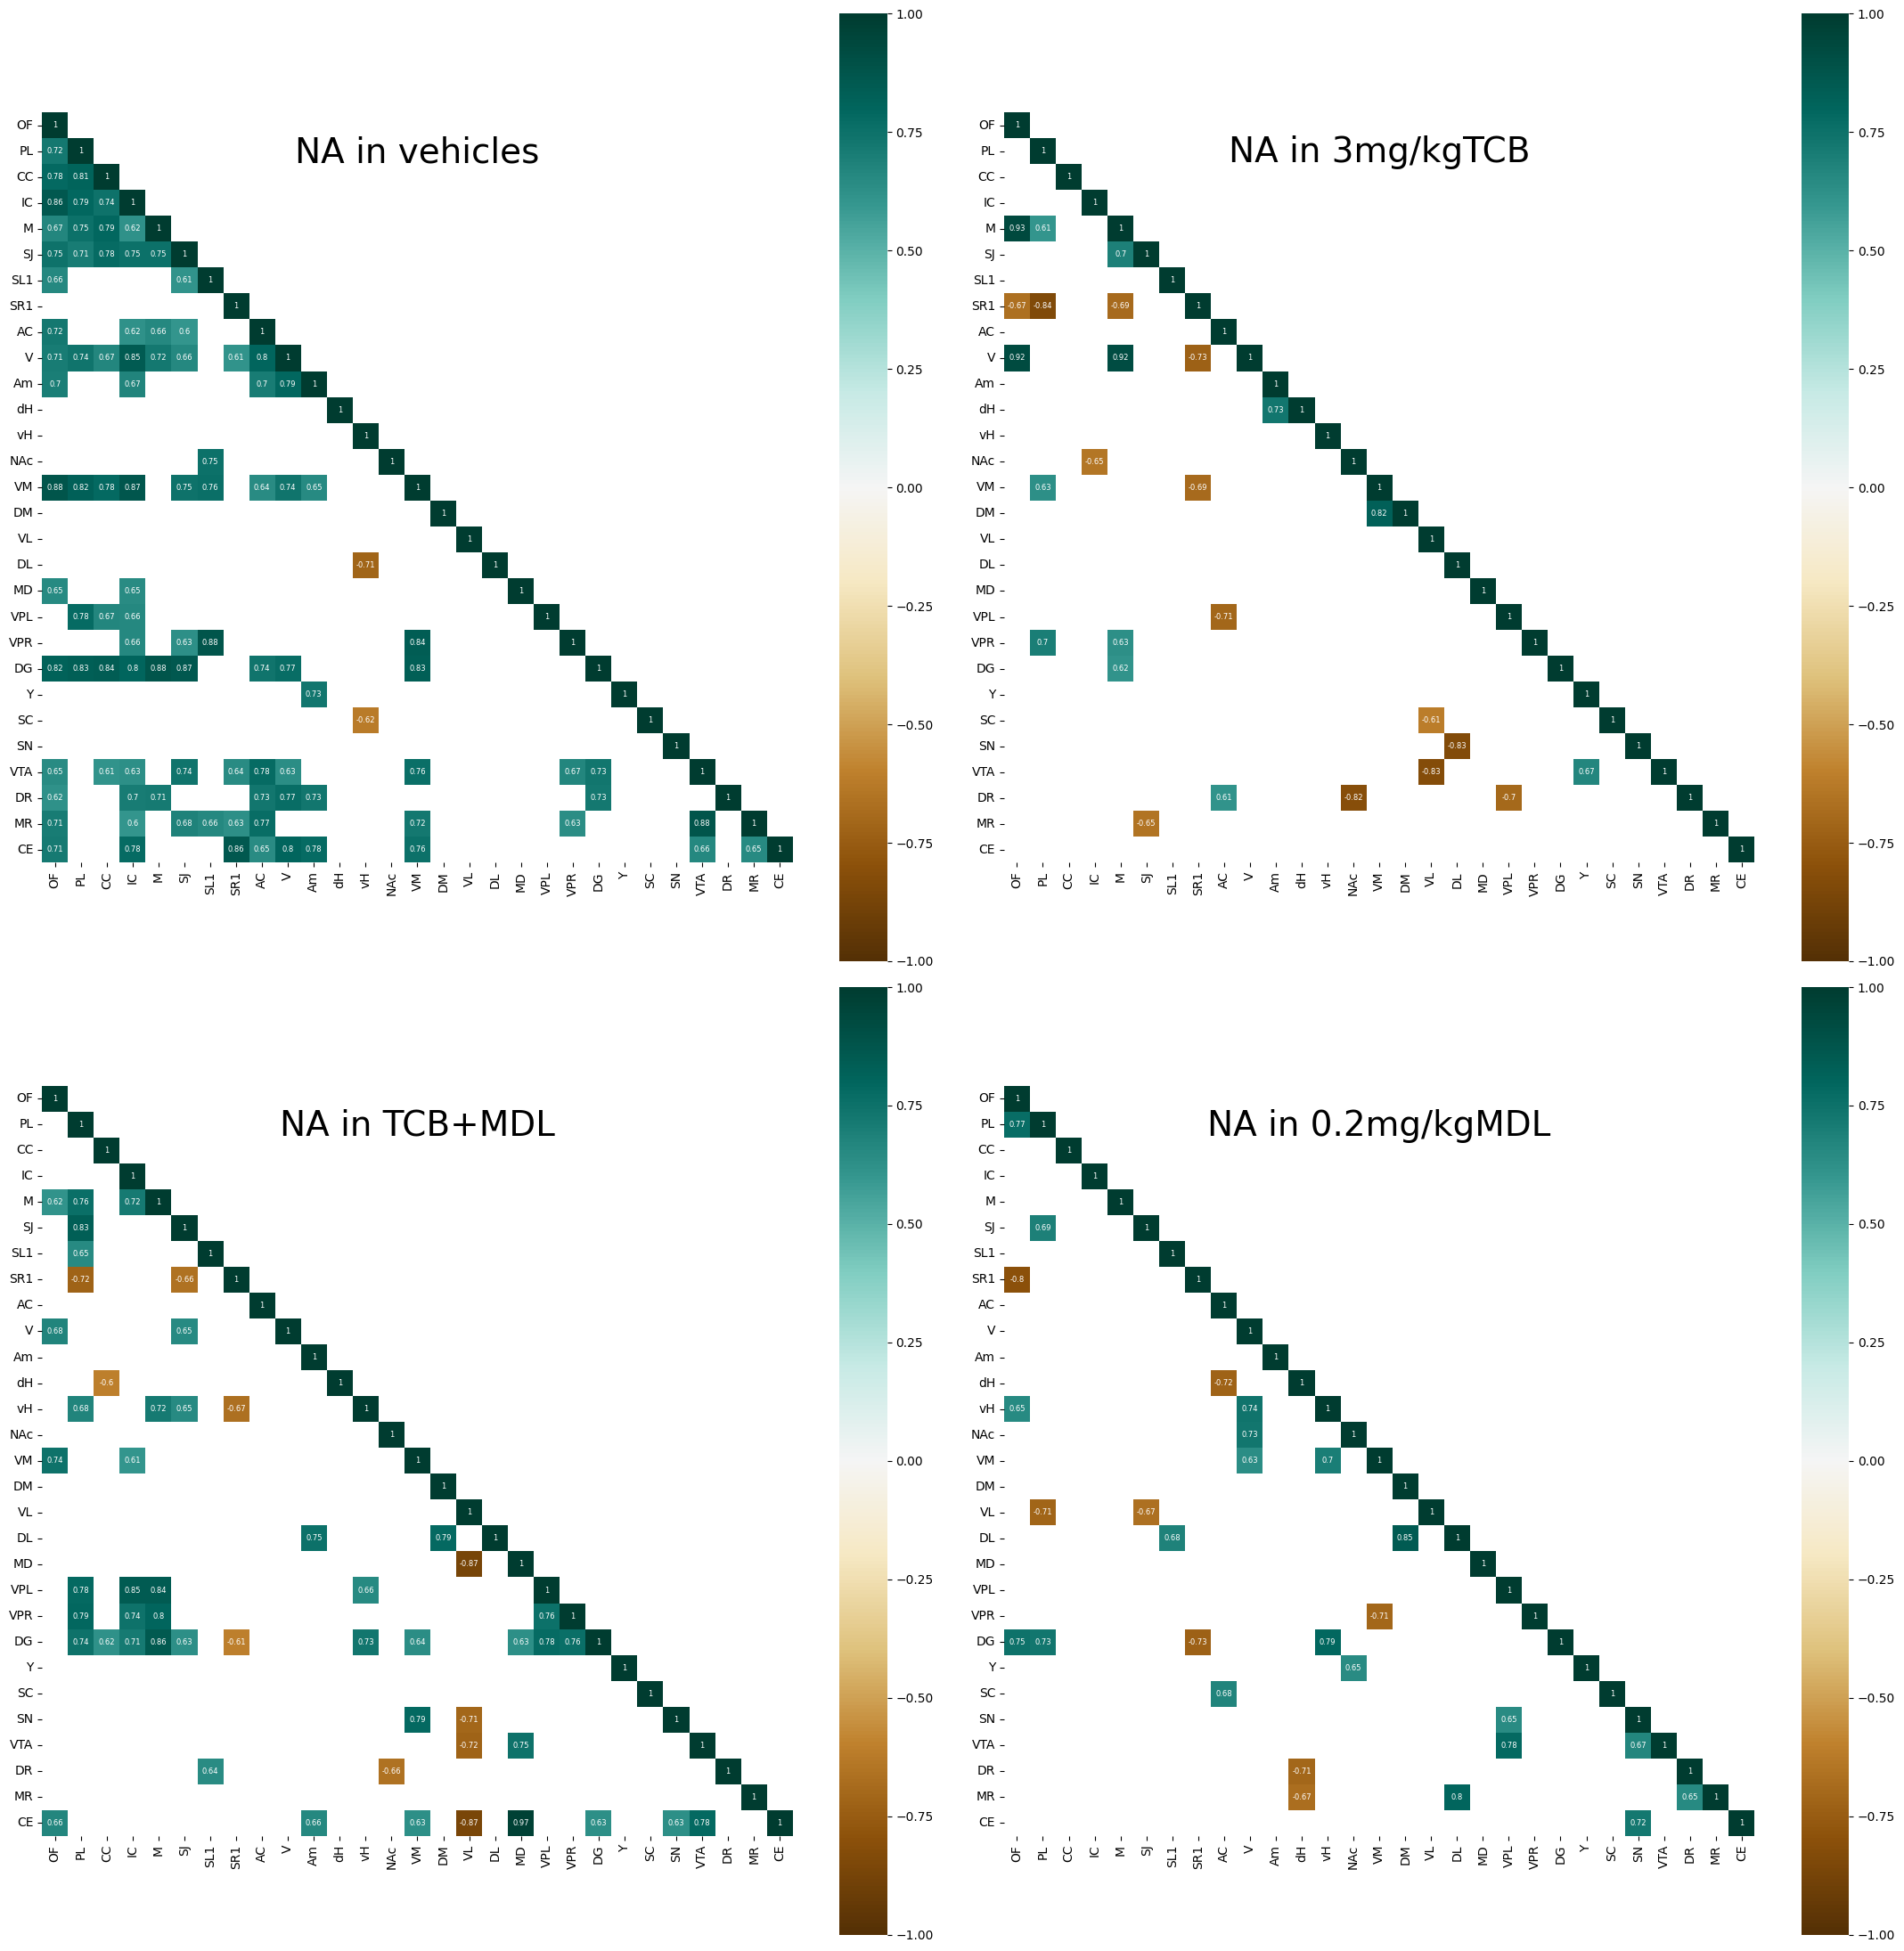

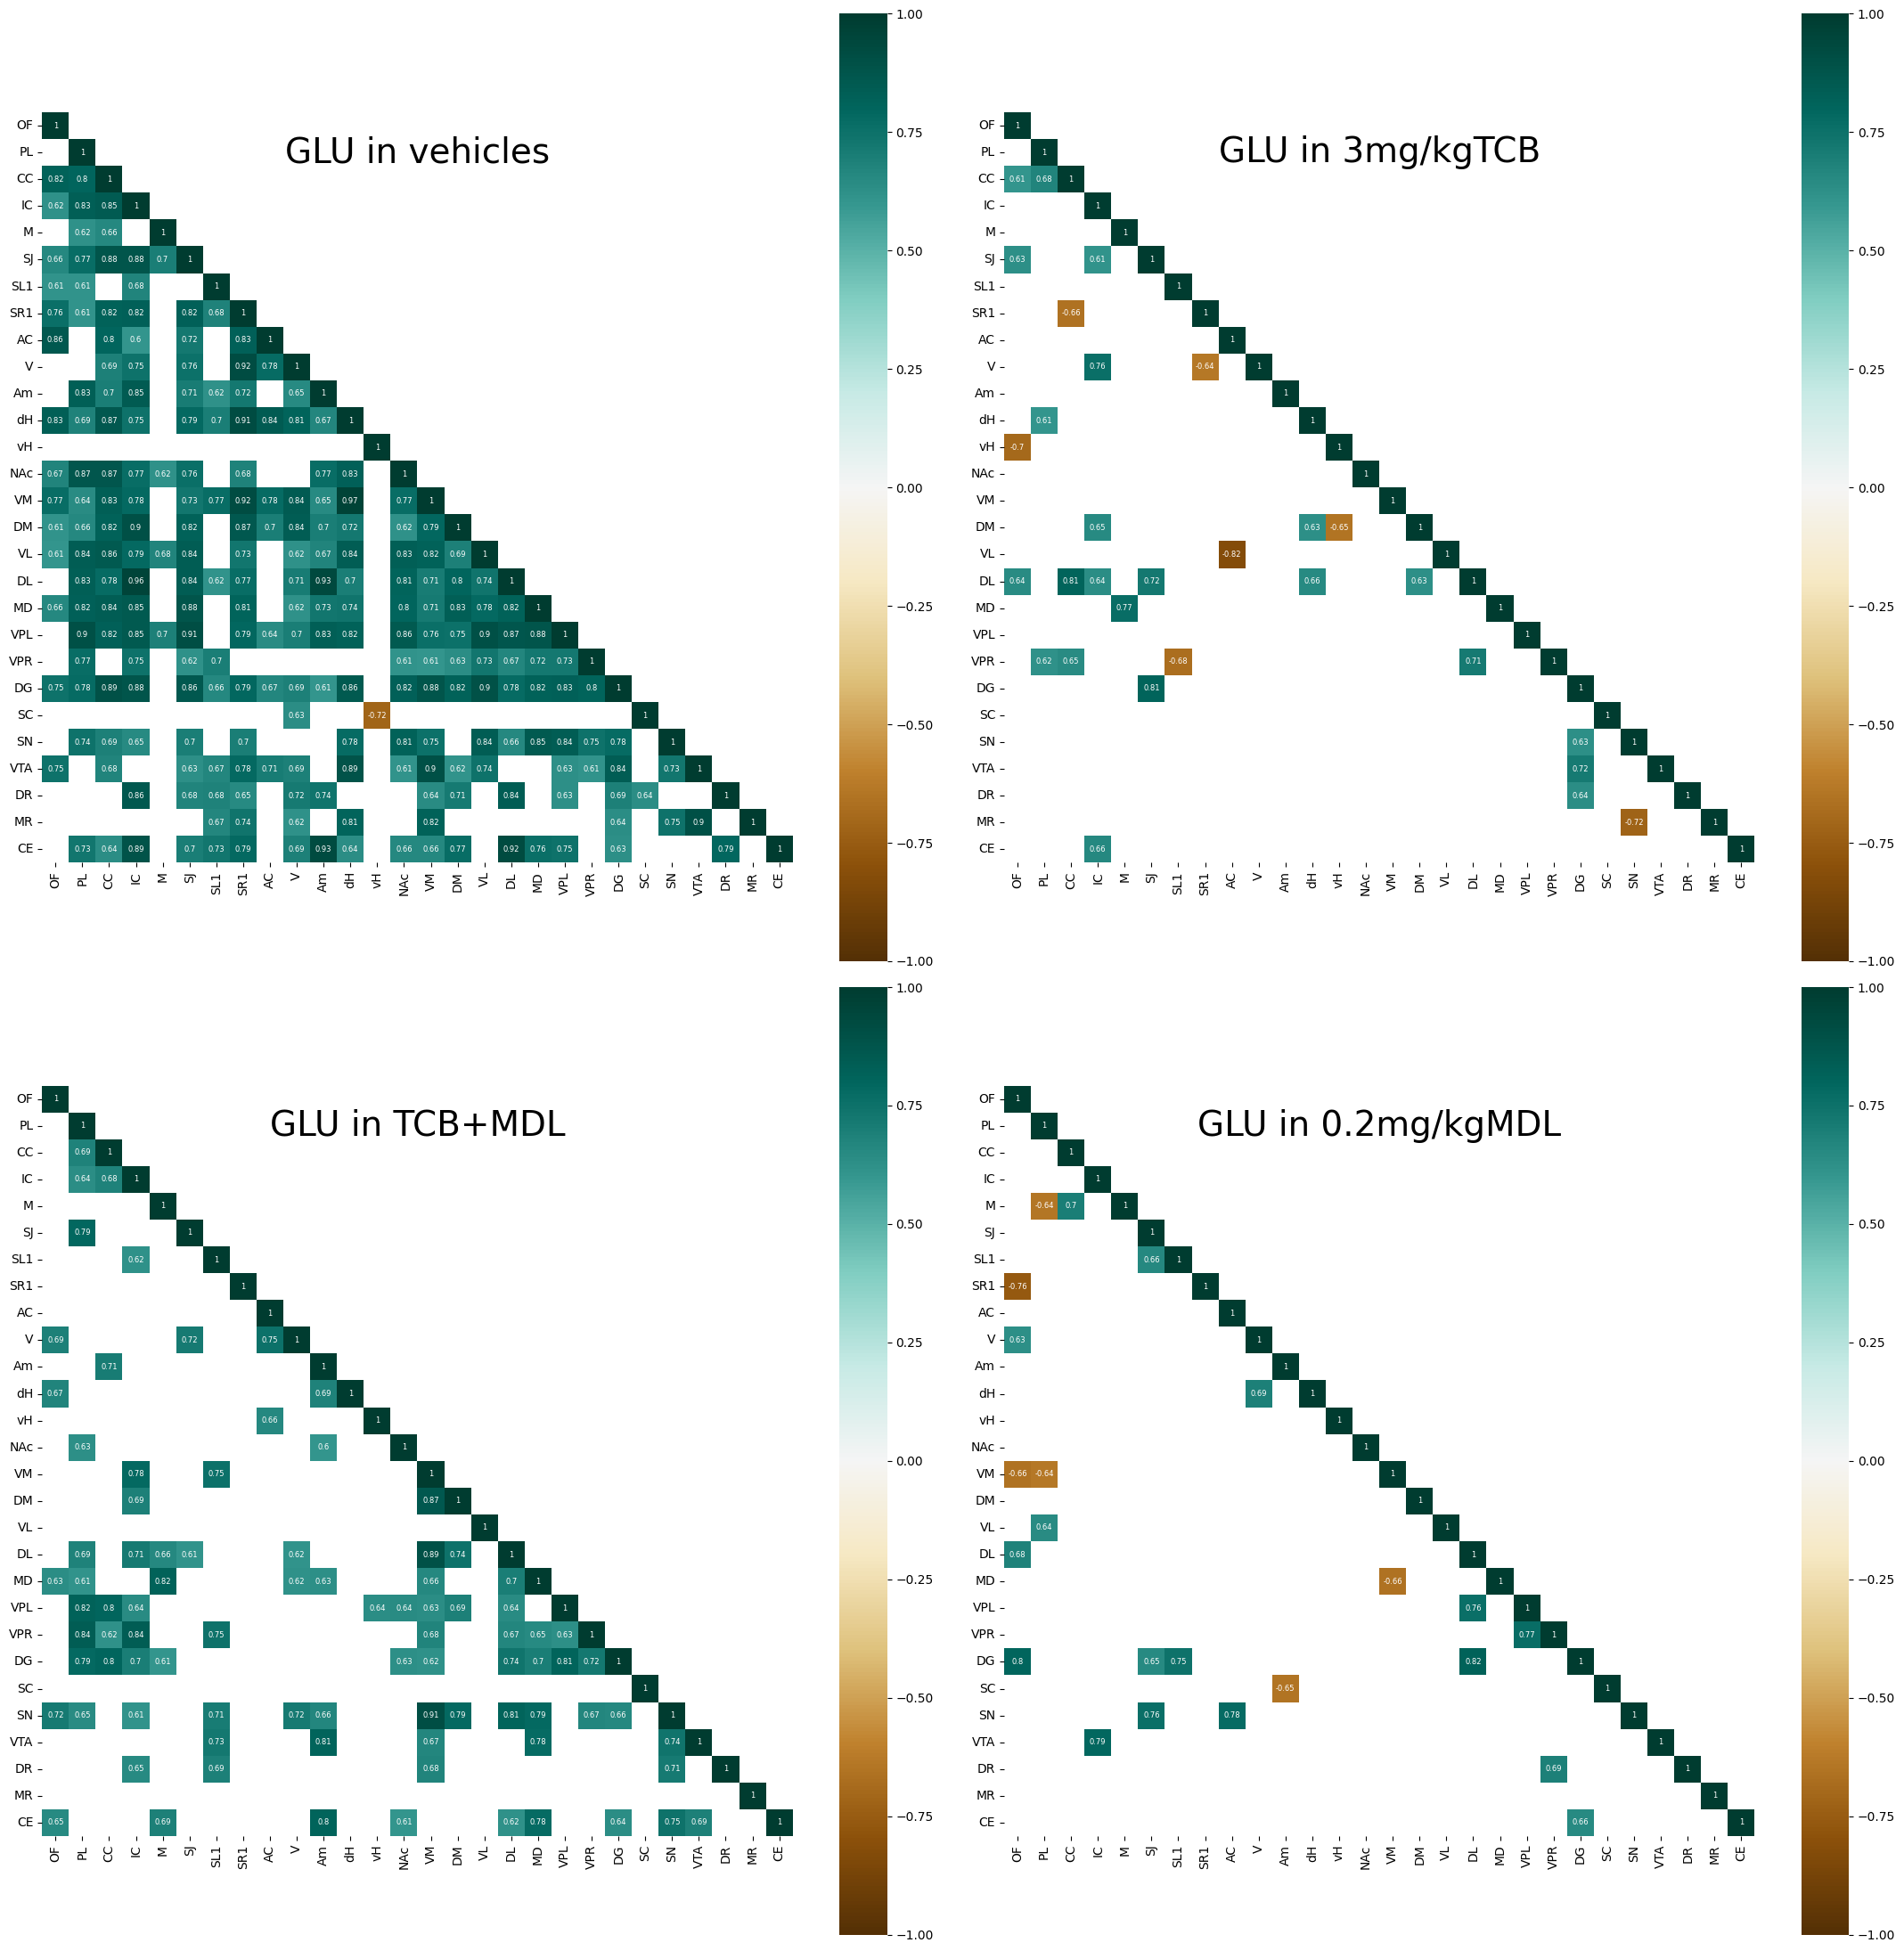

In [7]:

#build bar corr
#from_scratch = not working in getAndPlotMultipleCorrelograms()
#how can i get access to the file name or the .svg !?!?

### CORRELOGRAMS ###
# use case:
# getAndPlotMultipleCorrelograms(filename, {'compound':['DA', 'NA', '5HT-DA'], 'region':['CC','CC-IC'], 'experiment': 'dose_response'}, p_value_threshold=0.05, n_minimum=5, from_scratch=True)
# getAndPlotSingleCorrelogram(filename, p_value_threshold=0.05, n_minimum=5) #This is the user friendly version with prompt
# getAndPlotSingleCorrelogram(filename, experiment='dose_response', correlogram_type='compound', to_correlate='DA', p_value_threshold=0.05, n_minimum=5) #This is to save time and skip the prompt
# getAndPlotSingleCorrelogram(filename, experiment='agonist_antagonist', correlogram_type='compound', to_correlate='GLU-GABA', p_value_threshold=0.05, n_minimum=5, from_scratch= True) #This is to save time and skip the prompt

columns = ['OF', 'PL', 'CC', 'IC', 'M', 'SJ', 'SL1', 'SR1',  'AC', 'V' , 'Am', 'dH', 'vH', 
                                       'NAc', 'VM', 'DM', 'VL', 'DL', 'MD', 'VPL', 'VPR', 'DG', 'Y', 'SC', 'SN', 'VTA', 
                                       'DR', 'MR', 'CE' ]

getAndPlotSingleCorrelogram(filename, experiment='agonist_antagonist', correlogram_type='compound', to_correlate='5HT', 
                            columns = columns, p_value_threshold=0.05, n_minimum=5, from_scratch=True) #This is to save time and skip the prompt

getAndPlotSingleCorrelogram(filename, experiment='agonist_antagonist', correlogram_type='compound', to_correlate='NA', 
                            columns = columns, p_value_threshold=0.05, n_minimum=5, from_scratch=True) #This is to save time and skip the prompt

getAndPlotSingleCorrelogram(filename, experiment='agonist_antagonist', correlogram_type='compound', to_correlate='GLU', 
                            columns = columns, p_value_threshold=0.05, n_minimum=5, from_scratch=True) #This is to save time and skip the prompt


#FIX ME: https://stackoverflow.com/questions/13784201/how-to-have-one-colorbar-for-all-subplots